In this lesson I'll continue on with the topic of matrices by talking about important matrix factorizations. Matrix factorizations are very useful for understanding their behavior, as well as for developing algorithms to efficiently do numerical linear algebra, and even do new things like compression or dimension reduction. Let's get started.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from utils.math_ml import *

plt.rcParams["figure.figsize"] = (4, 3)

Given any two compatible matrices $\mathbf{A}$ and $\mathbf{B}$, we can get a third matrix $\mathbf{C}$ by matrix multiplication, $\mathbf{C} = \mathbf{A}\mathbf{B}$. Now suppose we wanted to go the other way. Given a matrix $\mathbf{C}$, how can we *factor* it back out into a product $\mathbf{A}\mathbf{B}$? This is the idea behind matrix factorization. In practice, we're interested in factoring a matrix into a product of special types of matrices that are easier to work with, like symmetric, diagonal, or orthogonal matrices.

### LU Factorization

Probably the most basic matrix factorization is the LU Factorization. LU factorization factors an $m \times n$ matrix $\mathbf{A}$ into a product of a lower triangular matrix $\mathbf{L}$ and an upper triangular matrix $\mathbf{U}$,
$$\mathbf{A} = \mathbf{L}\mathbf{U}.$$

The LU factorization is most useful for solving a system of linear equations. If $\mathbf{A}\mathbf{x}=\mathbf{b}$, we can do an LU factorization of $\mathbf{A}$ and write the system as $\mathbf{LUx} = \mathbf{b}$. This can then be solved by breaking it into two steps, known as *forward substitution* and *back substitution*,

- Forward substitution: Solve $\mathbf{Ly} = \mathbf{b}$ for $\mathbf{y}$.
- Back Substitution: Solve $\mathbf{Ux} = \mathbf{y}$ for $\mathbf{x}$.

These two steps are easy to do since each system can be solved by substitution, working from the "tip" of the triangle down. The LU factorization is essentially what matrix solvers like `np.linalg.solve` do to solve linear systems. 

Of course, the question still remains how to actually factor $\mathbf{A}$ into $\mathbf{L}\mathbf{U}$. I won't describe the algorithm to do this, or any matrix factorization really, since their inner workings aren't that relevant to machine learning. If you're curious, LU factorization is done using some variant of an algorithm known as [Gaussian Elimination](https://en.wikipedia.org/wiki/Gaussian_elimination). Note the LU factorization in general is a cubic time algorithm, i.e. $O(n^3)$ if $\mathbf{A}$ is $n \times n$.

The LU factorization can also be used to compute the determinant of a square matrix. Since $\mathbf{L}$ and $\mathbf{U}$ are triangular, their determinant is just the product of their diagonals. Using the product rule for determinants then gives

$$\text{det}(\mathbf{A}) = \text{det}(\mathbf{LU}) = \text{det}(\mathbf{L}) \cdot \text{det}(\mathbf{U}) = \prod_{i=0}^{n-1} L_{i,i} \cdot U_{i,i}.$$

The LU factorization can also be used to compute the inverse of a square matrix. The idea is to solve the *matrix system* of equations

$$\mathbf{A} \mathbf{X} = \mathbf{I},$$

assuming $\mathbf{X}=\mathbf{A}^{-1}$ are the $n^2$ unknown variables you're solving for. This system can be solved by using the same technique of forward substitution plus back substitution. Note that solving for both the determinant and inverse this way each takes $O(n^3)$ time due to the LU decomposition. This is one reason why you should probably avoid calculating these quantities explicitly unless you really need them.

Strangely, numpy doesn't have a built-in LU factorization solver, but scipy does using `scipy.linalg.lu`. It factors a matrix into not two, but three products, $\mathbf{A}=\mathbf{PLU}$. The $\mathbf{P}$ is a *permutation matrix*. It just accounts for the fact that sometimes you need to swap the rows before doing the LU factorization. I won't go into that. Here's the LU factorization of the above example matrix. I'll also verify that $\mathbf{A}=\mathbf{LU}$.

In [2]:
from scipy.linalg import lu

A = np.array([[1, 1], 
              [1, -1]])
P, L, U = lu(A)
print(f'L = \n{L}')
print(f'U = \n{U}')
print(f'LU = \n{L @ U}')

L = 
[[1. 0.]
 [1. 1.]]
U = 
[[ 1.  1.]
 [ 0. -2.]]
LU = 
[[ 1.  1.]
 [ 1. -1.]]


### QR Factorization

Another useful factorization is to factor a matrix $\mathbf{A}$ into a product of an orthogonal matrix $\mathbf{Q}$ and an upper triangular matrix $\mathbf{R}$,

$$\mathbf{A} = \mathbf{QR}.$$

The QR factorization is useful if we want to create an orthonormal basis out of the column vectors of $\mathbf{A}$, since $\mathbf{Q}$ will give a complete set of basis vectors built from orthogonalizing $\mathbf{A}$. It's also useful for calculating other random things of interest. Like LU factorization, it can be used to calculate determinants, since

$$\text{det}(\mathbf{A}) = \text{det}(\mathbf{QR}) = \text{det}(\mathbf{Q}) \cdot \text{det}(\mathbf{R}) = 1 \cdot \text{det}(\mathbf{R}) = \prod_{i=0}^{n-1} R_{i,i}.$$

It can also be used to find the inverse matrix. Use the fact that $\mathbf{A}^{-1} = (\mathbf{QR})^{-1} = \mathbf{R}^{-1} \mathbf{Q}^\top$, since $\mathbf{Q}$ is orthogonal. The matrix $\mathbf{R}^{-1}$ can be calculated efficiently via back-substitution since $\mathbf{R}$ just a triangular matrix. Both the determinant and inverse calculation again take $O(n^3)$ time because the QR factorization does.

QR factorization is also useful for efficiently calculating the eigenvalues and eigenvectors of a symmetric matrix. I'll cover what those are in a second. 

In practice, this factorization is done using algorithms like [Gram-Schmidt](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process) or [Householder reflections](https://en.wikipedia.org/wiki/Householder_reflection). Just like LU factorization, QR factorization is in general an $O(n^3)$ algorithm. In numpy, you can get the QR factorization using `np.linalg.qr(A)`. Here's the QR factorization of the same matrix from before.

In [3]:
A = np.array([[1, 1], 
              [1, -1]])
Q, R = np.linalg.qr(A)
print(f'Q = \n{Q.round(10)}')
print(f'R = \n{R.round(10)}')
print(f'QR = \n{Q @ R}')

Q = 
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
R = 
[[-1.41421356  0.        ]
 [ 0.         -1.41421356]]
QR = 
[[ 1.  1.]
 [ 1. -1.]]


### Spectral Decomposition

The spectral decomposition is a way to factor a symmetric matrix $\mathbf{S}$ into a product of an orthonormal matrix $\mathbf{X}$ and a diagonal matrix $\mathbf{\Lambda}$,

$$\mathbf{S} = \mathbf{X \Lambda X}^\top.$$

The matrix $\mathbf{\Lambda}$ is called the **eigenvalue matrix**, and $\mathbf{X}$ is the **eigenvector matrix**. The diagonal entries of $\mathbf{\Lambda}$ are called the **eigenvalues** of $\mathbf{S}$, denoted $\lambda_i$,

$$\mathbf{\Lambda} = \text{diag}(\lambda_0, \lambda_1, \cdots, \lambda_n).$$

The column vectors of $\mathbf{X}$ are called the **eigenvectors** of $\mathbf{S}$, denoted $\mathbf{x}_i$,

$$\mathbf{X} = \begin{pmatrix} \mathbf{x}_0 & \mathbf{x}_1 & \cdots & \mathbf{x}_{n-1} \end{pmatrix}.$$

Eigenvalues and eigenvectors arise from trying to find special "characteristic" lines in the vector space $\mathbb{R}^n$ that stay fixed when acted on by $\mathbf{S}$. Let $\mathbf{x}$ be the unit vector along one of these lines. Saying $\mathbf{S}$ can't rotate $\mathbf{x}$ is equivalent to saying it can only *scale* $\mathbf{x}$ by some value $\lambda$. Finding these special characteristic lines is thus equivalent to solving the equation

$$\mathbf{S}\mathbf{x} = \lambda \mathbf{x}$$

for $\lambda$ and $\mathbf{x}$. The vector $\mathbf{x}$ is the eigenvector (German for "characteristic vector"). The scalar $\lambda$ is its corresponding eigenvalue (German for "characteristic value"). We can rewrite this equation as $(\mathbf{S} - \lambda \mathbf{I})\mathbf{x} = \mathbf{0}$, where $\mathbf{0}$ is the zero vector. Taking the determinant of $\mathbf{S} - \lambda \mathbf{I}$ and insisting it must be singular gives a polynomial equation, called the **characteristic equation**, that can (in principle) be solved for the eigenvalue $\lambda$,

$$\text{det}(\mathbf{S} - \lambda \mathbf{I}) = 0.$$

For example, if $\mathbf{S}$ is a symmetric $2 \times 2$ matrix, we have

$$
\mathbf{S} = 
\begin{pmatrix}
a & b \\
b & d \\
\end{pmatrix} \quad \Longrightarrow \quad
\mathbf{S} - \lambda \mathbf{I} = 
\begin{pmatrix}
a-\lambda & b \\
b & d-\lambda \\
\end{pmatrix} \quad \Longrightarrow \quad
\text{det}(\mathbf{S} - \lambda \mathbf{I}) = (a - \lambda)(d - \lambda) - b^2 = \lambda^2 - (a + d)\lambda + (ad-b^2) = 0.
$$

Notice that $\text{tr}(\mathbf{S}) = a + d$ and $\text{det}(\mathbf{S}) = ad-b^2$, so the characteristic equation in this special $2 \times 2$ cases reduces to 

$$\lambda^2 - \text{tr}(\mathbf{S})\lambda + \text{det}(\mathbf{S}) = 0.$$

This is a quadratic equation whose solution is the two eigenvalues $\lambda_0, \lambda_1$. Once the eigenvalues are known, they can be plugged back into the linear equation $(\mathbf{S} - \lambda \mathbf{I})\mathbf{x} = \mathbf{0}$ to solve for the eigenvectors $\mathbf{x}_0, \mathbf{x}_1$, e.g. using LU factorization.

Just to put some numbers in, take the following specific $2 \times 2$ matrix

$$
\mathbf{S} = 
\begin{pmatrix}
2 & 1 \\
1 & 2 \\
\end{pmatrix}.
$$

Since $\text{tr}(\mathbf{S})=2+2=4$ and $\text{det}(\mathbf{S})=2 \cdot 2 - 1 \cdot 1 = 3$, the characteristic equation is

$$\lambda^2 - 4\lambda + 3 = 0 \quad \Longrightarrow \quad (\lambda-1)(\lambda - 3) = 0 \quad \Longrightarrow \quad \lambda=1, 3.$$

The eigenvalues for this matrix are thus $\lambda_0 = 3$ and $\lambda_1 = 1$. Note it's conventional to order the eigenvalues from largest to smallest, though it isn't required. The eigenvectors are gotten by solving the two systems 

$$
(\mathbf{S} - \lambda_0 \mathbf{I})\mathbf{x}_0 = \mathbf{0} \quad \Longrightarrow \quad
\begin{pmatrix}
2-3 & 1 \\
1 & 2-3 \\
\end{pmatrix}
\begin{pmatrix}
x_0 \\
y_0 \\
\end{pmatrix} = 
\begin{pmatrix}
0 \\
0 \\
\end{pmatrix} \quad \Longrightarrow \quad
\mathbf{x}_0 = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1 \\
\end{pmatrix} \approx
\begin{pmatrix}
0.707 \\
0.707 \\
\end{pmatrix},
$$

$$
(\mathbf{S} - \lambda_1 \mathbf{I})\mathbf{x}_1 = \mathbf{0} \quad \Longrightarrow \quad
\begin{pmatrix}
2-1 & 1 \\
1 & 2-1 \\
\end{pmatrix}
\begin{pmatrix}
x_1 \\
y_1 \\
\end{pmatrix} = 
\begin{pmatrix}
0 \\
0 \\
\end{pmatrix} \quad \Longrightarrow \quad
\mathbf{x}_1 = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
-1 \\
\end{pmatrix} \approx
\begin{pmatrix}
0.707 \\
-0.707 \\
\end{pmatrix}.
$$

You can easily check that $\mathbf{x}_0$ and $\mathbf{x}_1$ are orthogonal. Note the eigenvectors here have been normalized so $||\mathbf{x}_0||=||\mathbf{x}_1||=1$. This isn't required, but it's the most common convention to ensure the eigenvector matrix $\mathbf{X}$ is a properly orthogonal.

Here's a plot of what this looks like. I'll show that $\mathbf{v}_0=\sqrt{2}\mathbf{x}_0=(1,1)$ gets scaled by a factor of $\lambda_0=3$ when acted on by $\mathbf{S}$. Similarly, I'll show that $\mathbf{v}_1=\sqrt{2}\mathbf{x}_1=(1,-1)$ gets scaled by a factor of $\lambda_1=1$ (i.e. not at all) when acted on by $\mathbf{S}$. Importantly, notice that $\mathbf{S}$ doesn't rotate either vector. They stay along their characteristic lines, or **eigenspaces**, which in this example are the lines $y=\pm x$.

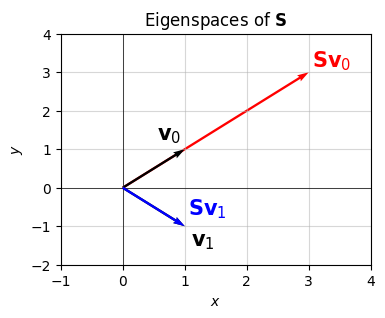

In [4]:
S = np.array([
    [2, 1], 
    [1, 2]])
v0 = np.array([1, 1]).reshape(-1, 1)
Sv0 = S @ v0
v1 = np.array([1, -1]).reshape(-1, 1)
Sv1 = S @ v1
vectors = [x.flatten() for x in [v0, Sv0, v1, Sv1]]
plot_vectors(
    vectors, colors=['black', 'red', 'black', 'blue'], xlim=(-1, 4), ylim=(-2, 4), zorders=[1, 0, 2, 3], 
    labels=['$\mathbf{v}_0$', '$\mathbf{S}\mathbf{v}_0$', '$\mathbf{v}_1$', '$\mathbf{S}\mathbf{v}_1$'],
    text_offsets=[[-0.45, 0.25], [0.05, 0.15], [0.1, -0.5], [0.05, 0.3]], 
    title='Eigenspaces of $\mathbf{S}$')

A result I won't prove, called the **spectral theorem**, guarantees that the eigenvalues of a symmetric matrix will be real-valued, and that the eigenvectors will form an orthonormal basis for $\mathbb{R}^n$. This is why $\mathbf{X}$ ends up being an orthogonal matrix. The fact that the eigenvalues have to be real is why we can think of symmetric matrices as the matrix generalization of a real number.

The spectral decomposition $\mathbf{S} = \mathbf{X \Lambda X}^\top$ is just a matrix way of writing the individual equations $\mathbf{S}\mathbf{x} = \lambda \mathbf{x}$. Grouping the eigenvectors and eigenvalues into matrices, we can write these equations in one go as $\mathbf{S}\mathbf{X} = \mathbf{\Lambda} \mathbf{X}$, which is just the spectral decomposition.

Back to our working example, putting the eigenvalues and eigenvectors into their respective matrices gives

$$
\mathbf{\Lambda} = 
\begin{pmatrix}
3 & 0 \\
0 & 1 \\
\end{pmatrix}, \qquad
\mathbf{X} = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}.
$$

That is, the symmetric matrix $\mathbf{S}$ factorizes into the spectral decomposition

$$
\mathbf{S} = \mathbf{X \Lambda X}^\top = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
\begin{pmatrix}
3 & 0 \\
0 & 1 \\
\end{pmatrix}
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}.
$$

We can find the spectral decomposition of a symmetric matrix in numpy using `np.linalg.eigh(S)`. Note that `np.linalg.eig(S)` will also work, but `eigh` is more efficient for symmetric matrices than `eig`. In either case, they return a pair of arrays, the first being the *diagonals* of $\mathbf{\Lambda}$, the second being $\mathbf{X}$. I'll also verify that the spectral decomposition indeed gives $\mathbf{S}$.

In [5]:
S = np.array([[2, 1], 
              [1, 2]])
lambdas, X = np.linalg.eigh(S)
Lambda = np.diag(lambdas)
print(f'Lambda = \n{Lambda}')
print(f'X = \n{X}')
print(f'X Lambda X^T = \n{X @ Lambda @ X.T}')

Lambda = 
[[1. 0.]
 [0. 3.]]
X = 
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
X Lambda X^T = 
[[2. 1.]
 [1. 2.]]


Notice something from the example I just worked. It turns out that $\text{tr}(\mathbf{S}) = 4 = \lambda_0 + \lambda_1$ and $\text{det}(\mathbf{S}) = 3 = \lambda_0 \lambda_1$. This fact turns out to always be true for $n \times n$ symmetric matrices, namely if $\mathbf{S}$ has eigenvalues $\lambda_0, \lambda_1, \cdots, \lambda_{n-1}$, then

\begin{align*}
\text{tr}(\mathbf{S}) &= \sum_{i=0}^{n-1} \lambda_i = \lambda_0 + \lambda_1 + \cdots + \lambda_{n-1}, \\
\text{det}(\mathbf{S}) &= \prod_{i=0}^{n-1} \lambda_i = \lambda_0 \cdot \lambda_1 \cdots \lambda_{n-1}.
\end{align*}

This fact implies that $\mathbf{S}$ will be invertible if and only if all the eigenvalues are non-zero, since otherwise we'd have $\text{det}(\mathbf{S})=0$.

Given how important the spectral decomposition is to many applications, there are a lot of different algorithms for finding it, each with its own trade-offs. One popular algorithm for doing so is the *QR algorithm*. Roughly speaking, the QR algorithm works as follows:

- Start with $\mathbf{S}_0 = \mathbf{S}$.
- For some number of iterations $t=0,1,\cdots, T-1$ do the following:
    - Calculate the QR factorization of $\mathbf{S}_t$: $\mathbf{Q}_{t+1}, \mathbf{R}_{t+1} = \text{qr}(\mathbf{S}_t)$.
    - Update $\mathbf{S}_t$ by reversing the factorization order: $\mathbf{S}_{t+1} = \mathbf{R}_{t+1} \mathbf{Q}_{t+1}$.
- Take $\mathbf{\Lambda} \approx \mathbf{S}_{T-1}$ and $\mathbf{X} \approx \mathbf{Q}_{T-1}$.

Due to the QR factorizations and matrix multiplications, this algorithm will be $O(n^3)$ at each step, which all together gives a time complexity of $O(Tn^3)$. It's not at all obvious from what I've said why the QR algorithm even works. In fact, to work well it requires a few small [modifications](https://en.wikipedia.org/wiki/QR_algorithm) I won't go into.

### Positive Definiteness

The eigenvalues of a symmetric matrix $\mathbf{S}$ are important because they in some sense specify how much $\mathbf{S}$ tends to stretch vectors in different directions. Most important for machine learning purposes though is the *sign* of the eigenvalues. The sign of the eigenvalues of a symmetric matrix essentially determine how hard it is to optimize a given function. This is especially relevant in machine learning, since training a model is all about optimizing the loss function of a model's predictions against the data.

If $\mathbf{S}$ is $n \times n$, it will have $n$ eigenvalues $\lambda_0, \lambda_1, \cdots, \lambda_{n-1}$. Ignoring the fact that each eigenvalue can be zero, each one will be either positive or negative. That means the *sequence* of eigenvalues can have $2^n$ possible arrangements of signs. For example, when $n=3$, we could have any of the $2^3=8$ possible sign arrangements for the eigenvalues $(\lambda_0, \lambda_1, \lambda_2)$,

$$(+, +, +), \ (+, +, -), \ (+, -, +), \ (-, +, +), \ (+, -, -), \ (-, +, -), \ (-, -, +), \ (-, -, -).$$

Most of these arrangements will have mixed signs, but there will always be exactly two arrangements that don't, namely when the eigenvalues are all positive, and when the eigenvalues are all negative. These cases turn out to be special, as we'll see.

A symmetric matrix whose eigenvalues are all positive is called **positive definite**. A positive definite matrix is essentially the matrix equivalent of a positive real number. For this reason, we'll write $\mathbf{S} \succ 0$ to make the analogy of a scalar $s > 0$ being positive. Positive definite matrices loosely speaking correspond to what are called *convex functions*, or "upward bowl shaped" functions.

Similarly, a symmetric matrix whose eigenvalues are all negative is called **negative definite**. A negative definite matrix is essentially the matrix equivalent of a negative real number. For this reason, we'll write $\mathbf{S} \prec 0$ to make the analogy of a scalar $s < 0$ being negative. Negative definite matrices loosely speaking correspond to what are called *concave functions*, or "downward bowl shaped" functions.

If we now allow some of the eigenvalues to also be zero, we get the matrix equivalent of a non-negative and non-positive number, respectively. If the eigenvalues are all non-negative, the matrix is called **positive semi-definite**, written $\mathbf{S} \succcurlyeq 0$. If the eigenvalues are all non-positive, it's called **negative semi-definite**, written $\mathbf{S} \preccurlyeq 0$.

By taking the spectral decomposition of $\mathbf{S}$ and expanding everything out, it's possible to show that the following facts hold for any non-zero vector $\mathbf{x} \in \mathbb{R}^n$,
- Positive definite: If $\mathbf{S} \succ 0$, then $\mathbf{x}^\top \mathbf{S} \mathbf{x} > 0$.
- Negative definite: If $\mathbf{S} \prec 0$, then $\mathbf{x}^\top \mathbf{S} \mathbf{x} < 0$.
- Positive semi-definite: If $\mathbf{S} \succcurlyeq 0$, then $\mathbf{x}^\top \mathbf{S} \mathbf{x} \geq 0$.
- Negative semi-definite: If $\mathbf{S} \preccurlyeq 0$, then $\mathbf{x}^\top \mathbf{S} \mathbf{x} \leq 0$.

Expressions of the form $\mathbf{x}^\top \mathbf{S} \mathbf{x}$ are called **quadratic forms**. They'll always be scalars, since all they're doing is taking the dot product $\mathbf{x} \cdot \mathbf{S} \mathbf{x}$. This is why these types of matrices are the matrix generalization of positive or negative numbers. If these dot products are positive for any vector, that's about as good as we can do to say that the matrix itself is positive. Etc.

As you'd probably guess, the easiest way to determine if a symmetric matrix is any of these types of definite is to just calculate the eigenvalues and check their signs. For example, I showed before that the matrix

$$
\mathbf{S} = 
\begin{pmatrix}
2 & 1 \\
1 & 2 \\
\end{pmatrix}
$$

has eigenvalues $\lambda_0 = 3$ and $\lambda_1 = 1$. Since both of these are positive, $\mathbf{S}$ is positive definite. It's also positive semi-definite since they're both non-negative. To check if a matrix is positive definite, for example, in numpy, you can do something like the following. Modify the inequality accordingly for the other types.

In [6]:
def is_positive_definite(S):
    eigvals = np.linalg.eigvals(S)
    return np.all(eigvals > 0)

S = np.array([[2, 1], 
              [1, 2]])
is_positive_definite(S)

True

### Singular Value Decomposition

The spectral decomposition is mostly useful for square symmetric matrices. Yet, the properties of eigenvalues and eigenvectors seem to be incredibly useful for understanding how a matrix behaves. They say something useful about the characteristic scales and directions of a matrix and its underlying linear operator. It turns out we *can* generalize the spectral decomposition to arbitrary matrices, but with some slight modifications. This modified factorization is called the **singular value decomposition**, or **SVD** for short.

Suppose $\mathbf{A}$ is some arbitrary $m \times n$ matrix. It turns out we can *always* factor $\mathbf{A}$ into a product of the form

$$\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top,$$

where $\mathbf{U}$ is an $m \times m$ orthogonal matrix called the **left singular matrix**, $\mathbf{V}$ is a different $n \times n$ orthogonal matrix called the **left singular matrix**, and $\mathbf{\Sigma}$ is an $m \times n$ diagonal matrix called the **singular value matrix**.

The singular value matrix $\mathbf{\Sigma}$ is a rectangular diagonal matrix. This means the diagonal will only have $k=\min(m, n)$ entries. The diagonal entries are called the **singular values** of $\mathbf{A}$, usually denoted $\sigma_0, \sigma_1, \cdots, \sigma_{k-1}$. Unlike eigenvalues, singular values are required to be non-negative. 

The column vectors of $\mathbf{U}$ and $\mathbf{V}$ are called the left and right **singular vectors** respectively. Since both matrices are orthogonal, their singular vectors will form an orthonormal basis for $\mathbb{R}^m$ and $\mathbb{R}^n$ respectively.

Notice that whereas with the spectral composition $\mathbf{S} = \mathbf{X} \mathbf{\Lambda} \mathbf{X}^\top$ has only a single orthogonal matrix $\mathbf{X}$, the SVD has two different orthogonal matrices $\mathbf{U}$ and $\mathbf{V}$ to worry about, and each one is a different size. Also, while $\mathbf{\Lambda}$ can contain eigenvalues of any sign, $\mathbf{\Sigma}$ can only contain singular values that are nonnegative. 

Nonetheless, the two factorizations are related by the following fact: The *singular values* of $\mathbf{A}$ are the *eigenvalues* of the symmetric matrix $\mathbf{S} = \mathbf{A}^\top \mathbf{A}$. Not only that, they're also the eigenvalues of the transposed symmetric matrix $\mathbf{S}^\top = \mathbf{A} \mathbf{A}^\top$. This fact gives one way you could actually calculate the SVD. The singular value matrix $\mathbf{\Sigma}$ will just be the eigenvalue matrix of $\mathbf{S}$ (and $\mathbf{S}^\top$). The left singular matrix $\mathbf{U}$ will be the eigenvector matrix of $\mathbf{S}$. The right singular matrix $\mathbf{V}$ will be the eigenvector matrix of $\mathbf{S}^\top$. Very roughly speaking, this is what many SVD algorithms use, e.g. by applying the QR algorithm on both $\mathbf{S}$ and $\mathbf{S}^\top$.

Calculating the SVD by hand is much more of a pain than the spectral decomposition is because you have to do it twice, once on $\mathbf{S}$ and once on $\mathbf{S}^\top$. I'll spare you the agony of this calculation, and just use numpy to calculate the SVD of the following matrix,

$$
\mathbf{A} = 
\begin{pmatrix}
1 & 1 \\
1 & 0 \\
1 & -1 \\
\end{pmatrix}.
$$

We can use `np.linalg.svd(A)` to calculate the SVD of $\mathbf{A}$. It'll return a triplet of arrays, in order $\mathbf{U}$, the diagonal of $\mathbf{\Sigma}$, and $\mathbf{V}^T$. Note to get the full $\mathbf{\Sigma}$ you can't just use `np.diag` since $\mathbf{\Sigma}$ won't be square here. You have to add a row of zeros after to make the calculation work out. I'll do this just using a loop and filling in the diagonals manually. 

Notice that the two singular values are positive, $\sigma_0 = \sqrt{3} \approx 1.732$ and $\sigma_1 = \sqrt{2}  \approx 1.414$. In this example, the right singular matrix $\mathbf{V}$ is just $\text{diag}(-1, 1)$, which is clearly orthogonal. The left singular matrix $\mathbf{U}$ is a little harder to see, but it's also orthogonal. Finally, the product $\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top$ indeed gives $\mathbf{A}$.

In [7]:
A = np.array([
    [1, 1],
    [1, 0],
    [1, -1]])
m, n = A.shape
k = min(m, n)
U, sigma, Vt = np.linalg.svd(A)
Sigma = np.zeros((m, n))
for i in range(k):
    Sigma[i, i] = sigma[i]
USVt = U @ Sigma @ Vt
print(f'U = \n{U.round(10)}')
print(f'Sigma = \n{Sigma.round(10)}')
print(f'V = \n{Vt.T.round(10)}')
print(f'U Sigma V^T = \n{USVt.round(10)}')

U = 
[[-0.57735027  0.70710678  0.40824829]
 [-0.57735027  0.         -0.81649658]
 [-0.57735027 -0.70710678  0.40824829]]
Sigma = 
[[1.73205081 0.        ]
 [0.         1.41421356]
 [0.         0.        ]]
V = 
[[-1.  0.]
 [-0.  1.]]
U Sigma V^T = 
[[ 1.  1.]
 [ 1.  0.]
 [ 1. -1.]]


To give you an intuition is to what the SVD is doing, suppose $\mathbf{x} \in \mathbb{R}^n$ is some size-$n$ vector. Suppose we want to operate on $\mathbf{x}$ with $\mathbf{A}$ to get a new vector $\mathbf{v} = \mathbf{A}\mathbf{x}$. Writing $\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top$, we can do this operation in a sequence of three successive steps:

1. Calculate $\mathbf{y} = \mathbf{V}^\top \mathbf{x}$: The output is also a size-$n$ vector $\mathbf{y} \in \mathbb{R}^n$. Since $\mathbf{V}$ is orthogonal, this action can only rotate (or reflect) $\mathbf{x}$ by some angle in space.
2. Calculate $\mathbf{z} = \mathbf{\Sigma}\mathbf{y}$: The output is now a size-$k$ vector $\mathbf{z} \in \mathbb{R}^k$. Since $\mathbf{\Sigma}$ is diagonal, it can only stretch $\mathbf{y}$ along the singular directions of $\mathbf{V}$, not rotate it.
3. Calculate $\mathbf{v} = \mathbf{U}\mathbf{z}$: The output is now a size-$m$ vector $\mathbf{v} \in \mathbb{R}^m$. Since $\mathbf{U}$ is orthogonal, this action can only rotate (or reflect) $\mathbf{z}$ by some angle in space.

The final output is thus a vector $\mathbf{v} = \mathbf{A}\mathbf{x}$ that first got rotated in $\mathbb{R}^n$, then scaled in $\mathbb{R}^k$, then rotated again in $\mathbb{R}^m$. So you can visualize this better let's take a specific example. To make everything show up on one plot I'll choose a $2 \times 2$ matrix, so $m=n=k=2$, for example

$$
\mathbf{A} = 
\begin{pmatrix}
1 & 2 \\
1 & 1 \\
\end{pmatrix}.
$$

The singular values to this matrix turn out to be $\sigma_0 \approx 2.618$ and $\sigma_1 \approx 0.382$. What I'm going to do is randomly sample a bunch of unit vectors $\mathbf{x}$, then apply the successive operations above to each vector. The original vectors $\mathbf{x}$ are shown in red, the vectors $\mathbf{y} = \mathbf{V}^\top \mathbf{x}$ in blue, the vectors $\mathbf{z} = \mathbf{\Sigma}\mathbf{y}$ in green, and finally the vectors $\mathbf{v} = \mathbf{U}\mathbf{z}$ in black. Notice that the red vectors just kind of fill in the unit circle, since they're all unit vectors of length one. The blue vectors also fill in the unit circle, since $\mathbf{V}^\top$ can only rotate vectors, not stretch them. The green vectors then get stretched out into an elliptical shape due to $\mathbf{\Sigma}$. The distortion of the ellipse depends on the "distortion ratio" $\frac{\sigma_0}{\sigma_1} \approx 6.85$. This means one axis gets stretched about $6.85$ times as much as the other. Finally, since $\mathbf{U}$ can only rotate vectors, the black vectors then rotate these stretched vectors into their final position.

In [8]:
A = np.array([
    [1, 2],
    [1, 1]])
m, n = A.shape
k = min(m, n)
U, sigma, Vt = np.linalg.svd(A)
Sigma = np.diag(sigma)
print(f'Sigma = \n{Sigma.round(10)}')

Sigma = 
[[2.61803399 0.        ]
 [0.         0.38196601]]


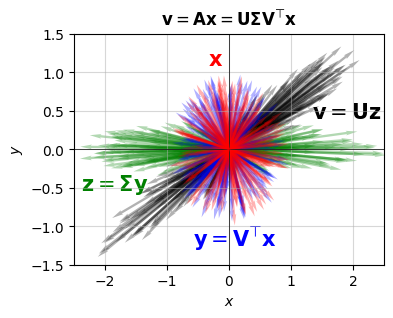

In [9]:
#| fig-align: center
plot_svd(A)

The "distortion ratio" $\frac{\sigma_0}{\sigma_1}$ mentioned above can actually be used as a measure of how invertible a matrix is. It's called the *condition number*, denoted $\kappa$. For a general $n \times n$ matrix, the **condition number** is defined as the ratio of the *largest* to the *smallest* singular value, 

$$\kappa = \frac{\sigma_0}{\sigma_{k-1}}.$$

The higher the condition number is, the harder it is to invert $\mathbf{A}$. A condition number of $\kappa=1$ is when the singular values are the same. These are easiest to invert. Matrices with low $\kappa$ are called called **well-conditioned** matrices. The identity matrix has $\kappa=1$, for example. If one of the singular values is $0$ then $\kappa$ will be infinite, meaning the matrix isn't invertible at all. Matrices with high $\kappa$ are called **ill-conditioned** matrices. For this reason, the condition number is very often used in calculations when it's important to make sure that $\mathbf{A}$ isn't singular or close to singular. In numpy, you can calculate the condition number of a matrix directly by using `np.linalg.cond(A)`.

### Low-Rank Approximations

The SVD is useful for many reasons. In fact, it's probably the single most useful factorization in all of applied linear algebra. One reason this is true is because *every matrix* has one. When in doubt, if you can't figure out how to do something with a matrix, you can take its SVD and try to work with those three matrices one-by-one. While that's nice, the more useful application of the SVD to machine learning is that it's a good way to compress or denoise data. To see why we need to look at the SVD in a slightly different way.

Suppose $\mathbf{A}$ is some $m \times n$ matrix. Suppose $\mathbf{u}_0, \mathbf{u}_1, \cdots, \mathbf{u}_{m-1}$ are the column vectors of $\mathbf{U}$, and $\mathbf{v}_0, \mathbf{v}_1, \cdots, \mathbf{v}_{n-1}$ are the column vectors of $\mathbf{V}$. Suppose $\sigma_0, \sigma_1, \cdots, \sigma_{k-1}$ are the singular values of $\mathbf{A}$, by convention ordered from largest to smallest. Then writing out the SVD in terms of the column vectors, and multiplying everything out matrix multiplication style, we have

$$
\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top = 
\begin{pmatrix}
\mathbf{u}_0 & \mathbf{u}_1 & \cdots & \mathbf{u}_{m-1}
\end{pmatrix}
\text{diag}\big(\sigma_0, \sigma_1, \cdots, \sigma_{k-1}\big)
\begin{pmatrix}
\mathbf{v}_0^\top \\ \mathbf{v}_1^\top \\ \cdots \\ \mathbf{v}_{n-1}^\top
\end{pmatrix} = 
\sum_{i=0}^{k-1} \sigma_i \mathbf{u}_i \mathbf{v}_i^\top = 
\sigma_0 \mathbf{u}_0 \mathbf{v}_0^\top + \sigma_1 \mathbf{u}_1 \mathbf{v}_1^\top + \cdots + \sigma_{k-1} \mathbf{u}_{k-1} \mathbf{v}_{k-1}^\top.
$$

That is, we can write $\mathbf{A}$ as a sum of outer products over the singular vectors, each weighted by its singular value. That's fine. But why is it useful? All I did was re-write the SVD in a different form, after all. The gist of it is that we can use this formula to approximate $\mathbf{A}$ by a lower-dimensional matrix. Supposing we only kept the first $d < k$ terms of the right-hand side and dropped the rest, we'd have

$$\mathbf{A} \approx \mathbf{U}_d \mathbf{\Sigma}_d \mathbf{V}_d^\top = \sigma_0 \mathbf{u}_0 \mathbf{v}_0^\top + \sigma_1 \mathbf{u}_1 \mathbf{v}_1^\top + \cdots + \sigma_{d-1} \mathbf{u}_{d-1} \mathbf{v}_{d-1}^\top.$$

This approximation will be a rank-$d$ matrix again of size $m \times n$. It's rank $d$ because it's a sum of $d$ "independent" rank-1 matrices. When $d<<k$, this is called the **low-rank approximation**. While this approximation is low *rank* it still has size $m \times n$. It's the inner dimensions that got cut from $k$ to $d$, not the outer dimensions. To get a true low-dimensional approximation, we need to multiply both sides by $\mathbf{V}_d$,

$$\mathbf{A}_d =  \mathbf{A} \mathbf{V}_d = \mathbf{U}_d \mathbf{\Sigma}_d.$$

We're now approximating the $m \times n$ matrix $\mathbf{A}$ with an $m \times d$ matrix I'll call $\mathbf{A}_d$. Said differently, we're *compressing* the $n$ columns of $\mathbf{A}$ down to just $d<<n$ columns. Note that we're not *dropping* the last $n-d$ columns, we're building new columns that best approximate *all* of the old columns.

Let's try to understand why low rank approximations are useful, and that they indeed do give good approximations to large matrices. To do so, consider the following example. I'm going to load some data from a well-known dataset in machine learning called MNIST. It's a dataset of images of handwritten digits. When the low-rank approximation is applied to data, it's called **principle components analysis**, or **PCA**. PCA is probably the most fundamental dimension reduction algorithm, a way of compressing high-dimensional data into lower-dimensional data.

Each image is size $28 \times 28$, which flatten out into $n = 28 \cdot 28 = 784$ dimensions. I'll load $m=1000$ random samples from the MNIST dataset. This will create a matrix $\mathbf{A}$ of shape $1000 \times 784$. I'll go ahead and calculate the SVD to get $\mathbf{U}$, $\mathbf{\Sigma}$, and $\mathbf{V}^\top$. In this case, $k=\min(m,n)=784$, so these matrices will have sizes $1000 \times 1000$, $1000 \times 784$, and $784 \times 784$ respectively. As I mentioned before, numpy only returns the non-zero diagonals of $\mathbf{\Sigma}$, which is a size $k=784$ vector of the singular values. Thankfully, that's all we'll need here.

In [10]:
m = 1000
A = sample_mnist(size=m)
U, sigma, Vt = np.linalg.svd(A)
A.shape, U.shape, sigma.shape, Vt.shape
print(f'A.shape = {A.shape}')
print(f'U.shape = {U.shape}')
print(f'sigma.shape = {sigma.shape}')
print(f'Vt.shape = {Vt.shape}')

A.shape = (1000, 784)
U.shape = (1000, 1000)
sigma.shape = (784,)
Vt.shape = (784, 784)


Think of each *row* of $\mathbf{A}$ as representing a single image in the dataset, and each *column* of $\mathbf{A}$ as representing a single pixel of the image.

Since these are images, I might as well show you what they look like. To do that, just pick a random row from the matrix. Each row will be a flattened image. To turn it into an image, we can just reshape the row to have shape $28 \times 28$, then plot it using `plt.imshow`. Below, I'm picking off the first row, which turns out to be an image of a handwritten $0$.

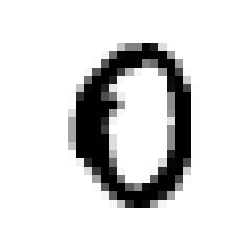

In [11]:
#| fig-align: center
#| code-fold: true
img = A[0, :].reshape(28, 28)
plt.imshow(img, cmap='Greys')
plt.axis('off')
plt.show()

Let's start by taking $d=2$. Why? Because when $d=2$ we can plot each image as a point in the xy-plane! This suggests a powerful application of the low-rank approximation, to visualize high-dimensional data. To calculate $\mathbf{A}_d$, we'll need to truncate $\mathbf{U}$, $\mathbf{\Sigma}$, and $\mathbf{V}^\top$. To make the shapes come out right, we'll want to drop the first $d$ *columns* of $\mathbf{U}$ and the first $d$ *rows* of $\mathbf{V}^\top$. Once we've got these, we can calculate $\mathbf{A}_d$, which in this case will be size $1000 \times 2$.

In [12]:
d = 2
U_d, sigma_d, Vt_d = U[:, :d], sigma[:d], Vt[:d, :]
A_d = A @ Vt_d.T
print(f'U_d.shape = {U_d.shape}')
print(f'sigma_d = {sigma_d}')
print(f'Vt_d.shape = {Vt_d.shape}')
print(f'A_d.shape = {A_d.shape}')

U_d.shape = (1000, 2)
sigma_d = [197.89062659  66.60026657]
Vt_d.shape = (2, 784)
A_d.shape = (1000, 2)


Now we have $m=1000$ "images", each with $d=2$ "variables". This means we can plot them in the xy-plane, taking $x$ to be the first column `A_d[:, 0]`, and $y$ to be the second column `A_d[:, 1]`. Here's a scatter plot of all images projected down to 2 dimensions. I can't make out any patterns in the plot, and you probably can't either. But at least we've found an interesting and sometimes useful way to visualize high-dimensional data.

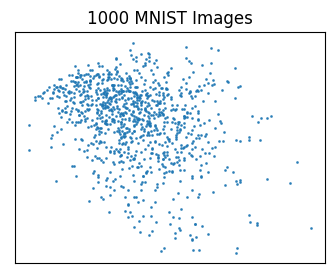

In [13]:
#| fig-align: center
#| code-fold: true
plt.scatter(A_d[:, 0], A_d[:, 1], s=1, alpha=0.8)
plt.xticks([])
plt.yticks([])
plt.title(f'{m} MNIST Images')
plt.show()

How good is our approximation? We can use the singular values to figure this out. In the low rank approximation, we're keeping $d$ singular values and dropping the remaining $k-d$. Throwing away those remaining singular values is throwing away information about our original matrix $\mathbf{A}$. To figure out how much information we're keeping in our approximation, we can just look at the ratio of the sum of singular values kept to the total sum of all singular values,

$$R_d = \frac{\sigma_0 + \sigma_1 + \cdots + \sigma_{d-1}}{\sigma_0 + \sigma_1 + \cdots + \sigma_{k-1}}.$$

This ratio is sometimes called the **explained variance** for reasons I'll get into in a future lesson.

In the rank-2 case I just worked out, this ratio turns out to be $R_2 = \frac{\sigma_0 + \sigma_1}{\sum \sigma_i} \approx 0.087$. That is, this rank-2 approximation is preserving about 8.7% of the information in the original data.

In [14]:
R_d = np.sum(sigma_d) / np.sum(sigma)
print(f'R_d = {R_d}')

R_d = 0.08740669535517863


That's pretty bad. We can do better. Let's take $d=100$ and see how well that does. Of course, we won't be able to plot the data in the xy-plane anymore, but it'll better represent the original data. We're now at $R_d \approx 0.643$, which means we're preserving about 64.3% of the information in the original data, and we're doing it using only $\frac{100}{784} \approx 0.127$, or 12.7% of the total columns of $\mathbf{A}$.

In [15]:
d = 100
U_d, sigma_d, Vt_d = U[:, :d], sigma[:d], Vt[:d, :]
A_d = A @ Vt_d.T
print(f'A_d.shape = {A_d.shape}')

A_d.shape = (1000, 100)


In [16]:
R_d = np.sum(sigma_d) / np.sum(sigma)
print(f'R_d = {R_d}')

R_d = 0.6433751746962163


Another way to see how good our compression is is to "unproject" the compressed images and plot them. To unproject $\mathbf{A}_d$, just multiply on the right again by $\mathbf{V}^\top$ to get the original $m \times n$ matrix approximation again,

$$\mathbf{A} \approx \mathbf{A}_d \mathbf{V}^\top.$$

Once I've done that, I can just pluck a random row from the approximation, resize it, and plot it using `plt.imshow`, just like before. Notice this time we can still clearly see the handwritten $0$, but it's a bit grainer than it was before. The edges aren't as sharp. Nevertheless, we can still make out the digit pretty solidly.

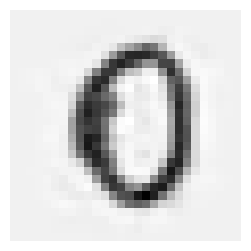

In [17]:
#| fig-align: center
#| code-fold: true
img = (A_d @ Vt_d)[0, :].reshape(28, 28)
plt.imshow(img, cmap='Greys')
plt.axis('off')
plt.show()

But why is this approach good for compression anyway? After all, we still have to unproject the rows back into the original $m \times n$ space. Maybe think about it this way. If you just stored the full matrix $\mathbf{A}$, you'd have tot store $m \cdot n$ total numbers. In this example, that's $1000 \cdot 784 = 784000$ numbers you'd have to store in memory. 

But suppose now we do the low rank approximation. What we can then do is just store $\mathbf{A}_d$ and $\mathbf{V}$ instead. That means we'd instead store $m \cdot d + d \cdot n$ total numbers. In our example, that comes out to $1000 \cdot 100 + 100 \cdot 784 = 100000 + 78400 = 178400$, which is only $\frac{178400}{784000} \approx 0.227$ or 22.7% of the numbers we'd have to store otherwise. We've thus compressed our data by a factor of about $\frac{1}{0.227} \approx 4.4$. That's a 4.4x compression of the original images. 

Now, this kind of PCA compression isn't *perfect*, or **lossless**, since we can't recover the original images *exactly*. But we can still recover the most fundamental features of the image, which in this case are the handwritten digits. This kind of compression is **lossy**, since it irreversibly throws away some information in the original data. Yet, it still maintains enough information to be useful in many settings.